## Quilting.ipynb

Python code to generate pattern combinations similar to 'Pathway to my garden' from Quilter's World Summer 2015


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Global dictionary to store valid cases
case_storage = {}

def find_quilt_combos(nblocks, main, small, max_offset=5.0):
    """
    Finds exact 1/4" increments and stores them as selectable 'Cases'.
    """
    global case_storage
    case_storage = {} # Reset storage
    valid_solutions = []
    
    # Test offsets in 0.25" increments
    for offset in np.arange(0.25, max_offset + 0.25, 0.25):
        # General formula: gap = (2*offset + main - (nblocks*small)) / (nblocks - 1)
        numerator = (2 * offset + main - (nblocks * small))
        gap = numerator / (nblocks - 1)
        
        # Check if gap is a positive 1/4" increment
        if gap >= 0 and np.isclose(gap * 4, np.round(gap * 4)):
            valid_solutions.append((gap, offset))
            
    print(f'FOR A {nblocks}-BLOCK QUILT PATTERN WITH MAIN = {main} and SMALL = {small} blocks')
    print(f'ALLOWABLE SPACING COMBINATIONS ARE:\n')

    for i, ans in enumerate(valid_solutions, 1):
        gap, offset = ans
        unit_size = small + (2 * offset) + main
        case_name = f"Case {i}"
        
        # Store for later use
        case_storage[case_name] = {
            'nblocks': nblocks, 'main': main, 'small': small,
            'gap': gap, 'offset': offset, 'unit_size': unit_size
        }
        
        print(f'{case_name}: Gap: {gap:4.2f}" | Offset: {offset:4.2f}" | Total Unit: {unit_size:5.2f}"')
    
def draw_quilt_pattern(case_label):
    """
    Plots the quilt based on a stored Case name.
    """
    if case_label not in case_storage:
        print(f"Error: {case_label} not found. Please run find_quilt_combos first.")
        return
    
    # Retrieve parameters
    c = case_storage[case_label]
    n, m, s, g, o, u = c['nblocks'], c['main'], c['small'], c['gap'], c['offset'], c['unit_size']

    fig = plt.figure(figsize=(14, 7))
    
    def add_unit(ax, ox, oy):
        # 1. Left Column
        for i in range(n):
            ax.add_patch(patches.Rectangle((ox, oy + i*(s+g)), s, s, facecolor='#90EE90', edgecolor='black'))
        # 2. Main Block
        ax.add_patch(patches.Rectangle((ox + s + o, oy + o), m, m, facecolor='#87CEEB', edgecolor='black', lw=1.5))
        # 3. Top Row (Shifted 1 small to the right)
        ty = oy + u - s
        for i in range(n):
            ax.add_patch(patches.Rectangle((ox + s + i*(s+g), ty), s, s, facecolor='#FA8072', edgecolor='black'))

    # Subplot 1: Single Unit
    ax1 = fig.add_subplot(121)
    add_unit(ax1, 0, 0)
    ax1.add_patch(patches.Rectangle((0, 0), u, u, fill=False, edgecolor='navy', ls='--', lw=2.5))
    ax1.set_title(f"{case_label}: {u}\" Unit")
    ax1.set_xlim(-0.5, u + s); ax1.set_ylim(-0.5, u + 0.5); ax1.set_aspect('equal')

    # Subplot 2: 2x2 Matrix
    ax2 = fig.add_subplot(122)
    for r in range(2):
        for col in range(2):
            add_unit(ax2, col * u, r * u)
    ax2.set_title(f"{case_label}: 2x2 Matrix Layout")
    ax2.set_xlim(-0.5, (u * 2) + s); ax2.set_ylim(-0.5, (u * 2) + 0.5); ax2.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the input boxes
n_input = widgets.IntText(value=4, description='nBlocks:', style={'description_width': 'initial'})
main_input = widgets.FloatText(value=8.5, description='Main Block:', style={'description_width': 'initial'})
small_input = widgets.FloatText(value=2.0, description='Small Block:', style={'description_width': 'initial'})

# Buttons and Output areas
find_btn = widgets.Button(description="1. Find Valid Cases", button_style='primary')
case_dropdown = widgets.Dropdown(description="2. Select Case:", options=[], disabled=True)
plot_out = widgets.Output()

def on_find_clicked(b):
    with plot_out:
        clear_output()
        # Run the logic with current inputs
        find_quilt_combos(nblocks=n_input.value, main=main_input.value, small=small_input.value)
        
        # Update the dropdown with the newly found cases
        if case_storage:
            case_list = sorted(case_storage.keys(), key=lambda x: int(x.split()[1]))
            case_dropdown.options = case_list
            case_dropdown.disabled = False
        else:
            case_dropdown.options = []
            case_dropdown.disabled = True
            print("No valid 1/4\" solutions found for these dimensions.")

def on_case_change(change):
    if change['new']:
        with plot_out:
            clear_output(wait=True)
            # Re-print the list for reference
            find_quilt_combos(nblocks=n_input.value, main=main_input.value, small=small_input.value)
            # Draw the specific case
            draw_quilt_pattern(change['new'])

# Link the buttons and dropdowns to the functions
find_btn.on_click(on_find_clicked)
case_dropdown.observe(on_case_change, names='value')

# Display the control panel
print("--- QUILT DESIGN CONTROL PANEL ---")
display(widgets.VBox([
    widgets.HBox([n_input, main_input, small_input]),
    find_btn,
    case_dropdown,
    plot_out
]))

--- QUILT DESIGN CONTROL PANEL ---


In [2]:
find_quilt_combos(nblocks=4, main=8.5, small=2)

FOR A 4-BLOCK QUILT PATTERN WITH MAIN = 8.5 and SMALL = 2 blocks
ALLOWABLE SPACING COMBINATIONS ARE:

Case 1: Gap: 0.50" | Offset: 0.50" | Total Unit: 11.50"
Case 2: Gap: 1.00" | Offset: 1.25" | Total Unit: 13.00"
Case 3: Gap: 1.50" | Offset: 2.00" | Total Unit: 14.50"
Case 4: Gap: 2.00" | Offset: 2.75" | Total Unit: 16.00"
Case 5: Gap: 2.50" | Offset: 3.50" | Total Unit: 17.50"
Case 6: Gap: 3.00" | Offset: 4.25" | Total Unit: 19.00"
Case 7: Gap: 3.50" | Offset: 5.00" | Total Unit: 20.50"


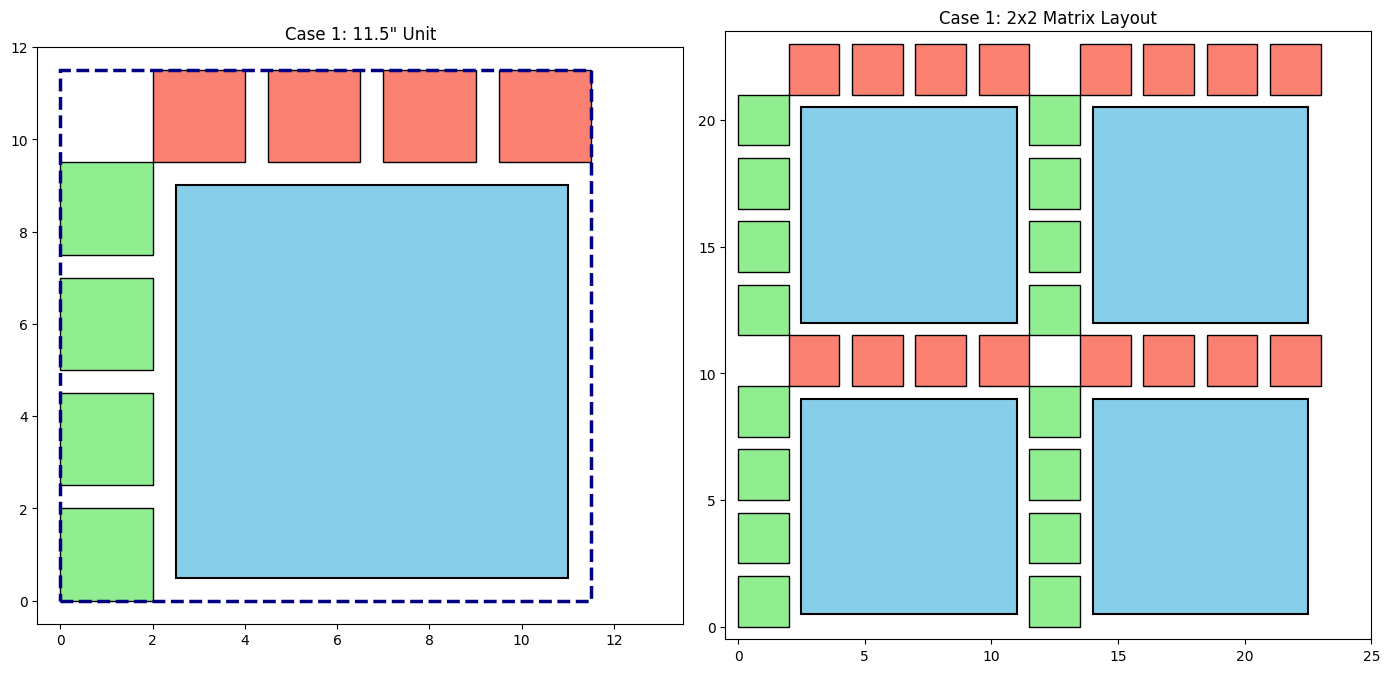

In [3]:
draw_quilt_pattern('Case 1')

In [4]:
find_quilt_combos(nblocks=3, main=8.5, small=3)

FOR A 3-BLOCK QUILT PATTERN WITH MAIN = 8.5 and SMALL = 3 blocks
ALLOWABLE SPACING COMBINATIONS ARE:

Case 1: Gap: 0.00" | Offset: 0.25" | Total Unit: 12.00"
Case 2: Gap: 0.25" | Offset: 0.50" | Total Unit: 12.50"
Case 3: Gap: 0.50" | Offset: 0.75" | Total Unit: 13.00"
Case 4: Gap: 0.75" | Offset: 1.00" | Total Unit: 13.50"
Case 5: Gap: 1.00" | Offset: 1.25" | Total Unit: 14.00"
Case 6: Gap: 1.25" | Offset: 1.50" | Total Unit: 14.50"
Case 7: Gap: 1.50" | Offset: 1.75" | Total Unit: 15.00"
Case 8: Gap: 1.75" | Offset: 2.00" | Total Unit: 15.50"
Case 9: Gap: 2.00" | Offset: 2.25" | Total Unit: 16.00"
Case 10: Gap: 2.25" | Offset: 2.50" | Total Unit: 16.50"
Case 11: Gap: 2.50" | Offset: 2.75" | Total Unit: 17.00"
Case 12: Gap: 2.75" | Offset: 3.00" | Total Unit: 17.50"
Case 13: Gap: 3.00" | Offset: 3.25" | Total Unit: 18.00"
Case 14: Gap: 3.25" | Offset: 3.50" | Total Unit: 18.50"
Case 15: Gap: 3.50" | Offset: 3.75" | Total Unit: 19.00"
Case 16: Gap: 3.75" | Offset: 4.00" | Total Unit: 19

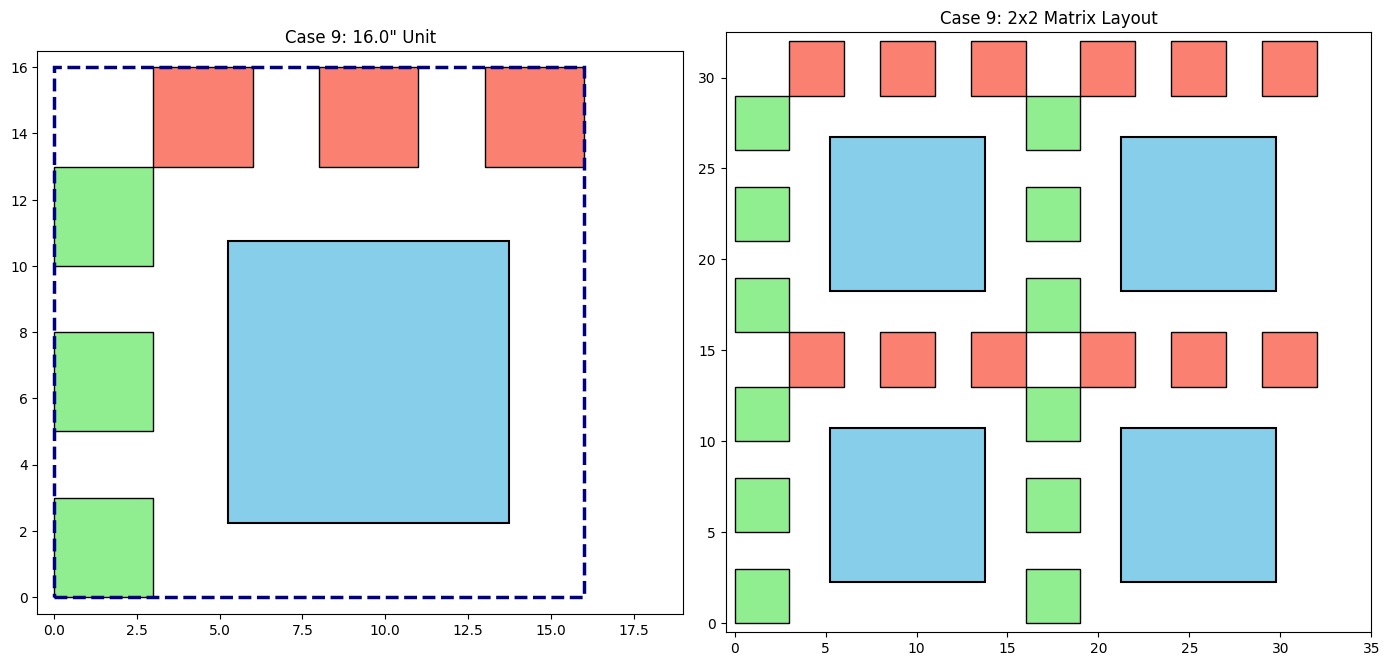

In [5]:
draw_quilt_pattern('Case 9')